# Improving the CIFAR-10 performance with data augmentation

https://www.packtpub.com/mapt/book/all_books/9781787128422/3/ch03lvl1sec26/recognizing-cifar-10-images-with-deep-learning

In [1]:
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

from keras.preprocessing.image import ImageDataGenerator

#from quiver_engine import server

Using TensorFlow backend.


In [3]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#constant
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()


#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
# network

model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same',
                        input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

D:\Anaconda3\envs\Keras\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  from ipykernel import kernelapp as app


In [6]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])

In [7]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [8]:
# train
 
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
	epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE)

#model.fit_generator(datagen.flow(X_train, Y_train,
#                        batch_size=BATCH_SIZE),
#                        samples_per_epoch=X_train.shape[0],
#                        nb_epoch=NB_EPOCH, 
#                        verbose=VERBOSE)

#server.launch(model)


print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 6s - loss: 1.7737 - acc: 0.3634 - val_loss: 1.4273 - val_acc: 0.4876
Epoch 2/40
40000/40000 [==============================] - 5s - loss: 1.3155 - acc: 0.5323 - val_loss: 1.1826 - val_acc: 0.5802
Epoch 3/40
40000/40000 [==============================] - 5s - loss: 1.1039 - acc: 0.6116 - val_loss: 0.9819 - val_acc: 0.6507
Epoch 4/40
40000/40000 [==============================] - 5s - loss: 0.9710 - acc: 0.6586 - val_loss: 0.8954 - val_acc: 0.6865
Epoch 5/40
40000/40000 [==============================] - 5s - loss: 0.8771 - acc: 0.6931 - val_loss: 0.9590 - val_acc: 0.6612
Epoch 6/40
40000/40000 [==============================] - 5s - loss: 0.8043 - acc: 0.7192 - val_loss: 0.7554 - val_acc: 0.7397
Epoch 7/40
40000/40000 [==============================] - 5s - loss: 0.7450 - acc: 0.7410 - val_loss: 0.7875 - val_acc: 0.7321
Epoch 8/40
40000/40000 [==============================] - 5s 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


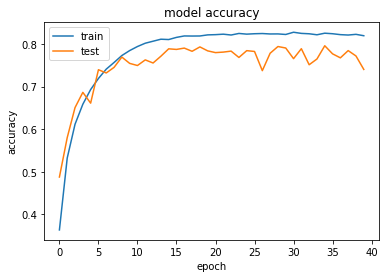

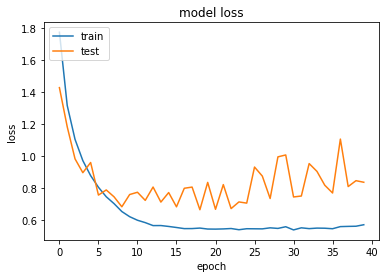

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()